## Dataset avvistamenti UFO

**Attenzione**: Nelle date (campo 'datetime') è presente anche come ora 24:xx che però causa problemi con 
        tutto quello che parsa le date. Ho fatto 'sostituisci tutto' 24 -> 00 ma non è proprio corretto
        perchè bisogna anche aumentare il giorno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
DATASET = 'ufos.csv'
data = pd.read_csv(DATASET)
data[:2]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082


In [ ]:
# Questo "aggiusta" il dataset originale e scrive un'altro file con i campi numerici
# aggiustati. L'originale ha dello sporco nei numeri

def fix_dataset():
    import csv

    def fix_row(row):
        def fix_value(x):
            return ''.join([c for c in str(x) if c.isdigit() or c in '+-.'])
        try:
            row[5] = fix_value(row[5])
            row[9] = fix_value(row[9])
        except ValueError:
            print('WARN: ', row)
        return row

    with open(DATASET, 'r') as dataset:
        reader = csv.reader(dataset)
        with open(f'fixed_{DATASET}', 'w') as out:
            out.write(','.join(next(reader)))
            out.write('\n')
            for row in reader:
                out.write(','.join(fix_row(row)))
                out.write('\n')

In [3]:
# Questo è leeeento
datetimes = pd.to_datetime(data['datetime'])

In [ ]:
counts = datetimes.dt.hour.value_counts()

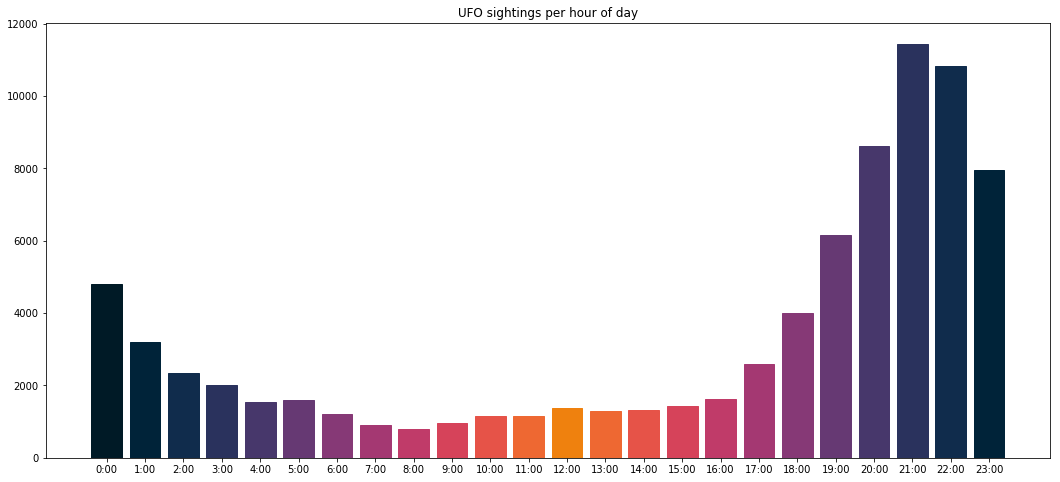

In [57]:
gradients = [
    (0, 26, 38), (0, 35, 57), (16, 44, 76), (42, 50, 93), 
    (71, 55, 107), (102, 57, 115), (134, 57, 118), (164, 56, 114), 
    (192, 59, 105), (214, 67, 90), (230, 83, 72), (238, 104, 50), 
    (239, 129, 14)
]
gradients = [(r/255, g/255, b/255, 1.0) for (r, g, b) in gradients]
gradients = gradients + list(reversed(gradients[:-1]))

plt.figure(figsize=(18, 8))
plt.title('UFO sightings per hour of day')
bars = plt.bar(counts.index, counts.get_values())
labels = [f'{h}:00' for h in range(0, 24)]
plt.xticks(range(len(labels)), labels)

for bar_i, index in enumerate(counts.index):
    bars[bar_i].set_color(gradients[index])
plt.show()